# Credit Card Fraud Detection Project

### Import the necessary modules

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools   # advanced tools
import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler   # data normalization
from sklearn.model_selection import train_test_split   # data split
from sklearn.ensemble import RandomForestClassifier   # Random forest tree algorithm
from sklearn.tree import DecisionTreeClassifier    # Decision tree algorithm
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score   # evaluation metric

### Load the csv file

In [17]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Perform Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isnull().values.any()

False

In [5]:
df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [6]:
cases = len(df)
non_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

from termcolor import colored as cl

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(non_fraud), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(fraud), attrs = ['bold']))
print(cl('Percentage of fraud cases is {:.4f}'.format(fraud_percent), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

# 0 means non fraud; 1 means fraud

CASE COUNT
--------------------------------------------
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of Non-fraud cases are 492
Percentage of fraud cases is 0.1727
--------------------------------------------


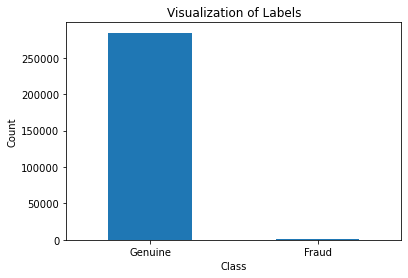

In [7]:
# Visualize the "Labels" column in our dataset

labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['Class'], sort = True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [8]:
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))

CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------------


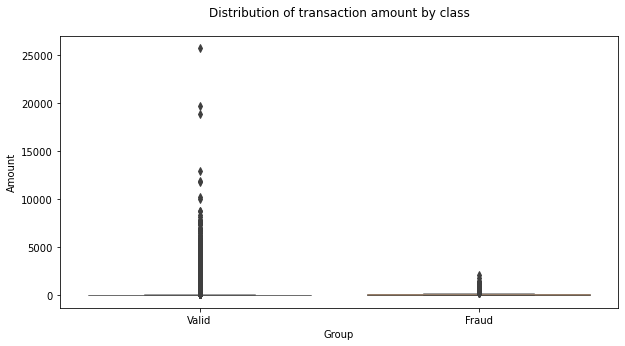

In [9]:
import seaborn as sns

df["Group"] = np.where(df["Class"] == 0, "Valid", "Fraud")

fig, ax = plt.subplots(1, 1, figsize = (10,5))
sns.boxplot(x = "Group", y = "Amount", linewidth = 0.5, width = 0.8, data = df)
plt.title("Distribution of transaction amount by class", y = 1.05, x = 0.5)
plt.show()


### Correlation matrix

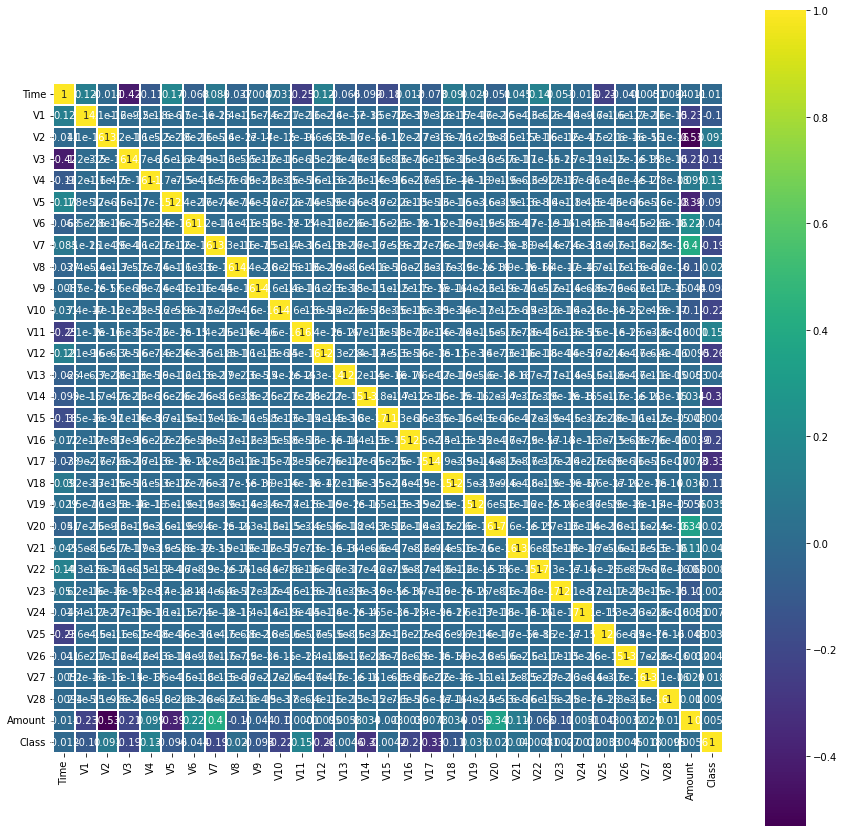

In [10]:
fig = plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), vmax = 1, linewidths = 0.01, square = True, annot = True, cmap = 'viridis', linecolor = "white")
plt.show()

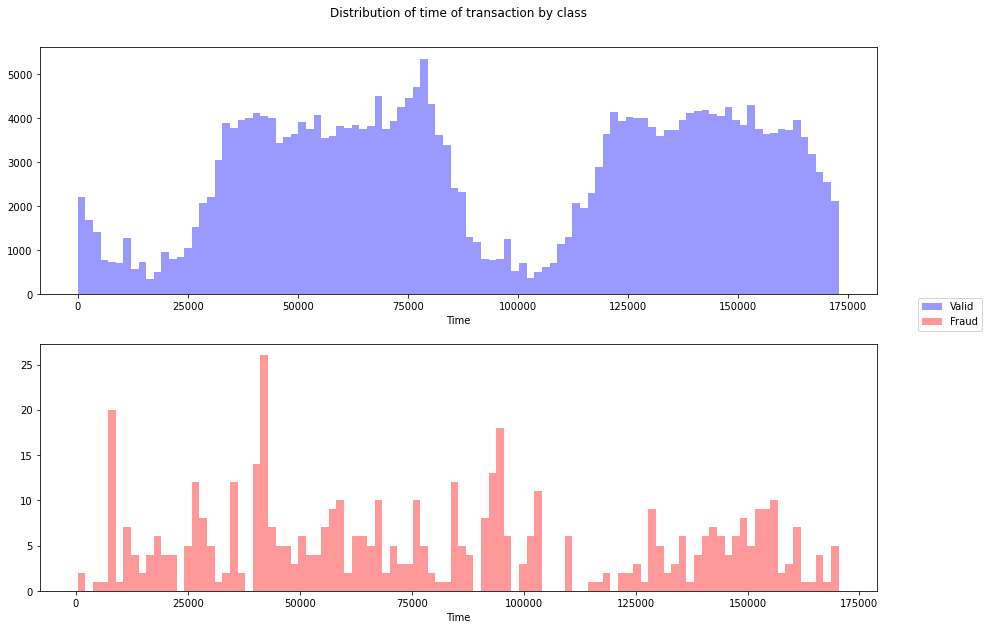

In [11]:
fig,axes = plt.subplots(2,1, figsize = (15,10))
sns.distplot(df.query("Group == 'Valid'").Time, color = "blue", ax = axes[0], kde = False, bins = 100, label = "Valid") 
sns.distplot(df.query("Group == 'Fraud'").Time, color = "red", ax = axes[1], kde = False, bins = 100, label = "Fraud")
fig.legend(loc = 'center right')
plt.title("Distribution of time of transaction by class", y = 2.3)
plt.show()


### Perform Scaling

In [18]:
scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df.drop(["Amount", "Time"], inplace = True, axis = 1)

Y = df["Class"]
X = df.drop(["Class"], axis = 1)

In [19]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### Split the data

In [20]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


Let's train different models on our dataset and observe which algorithm works better for our problem.


### Decision Tree Classifier

In [21]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)

predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100

### Random Forest

In [24]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(train_X, train_Y)

predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

### K-Nearest Neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_X, train_Y)

predictions_knn = knn.predict(test_X)
knn_score = knn.score(test_X, test_Y) * 100

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm

lr = LogisticRegression()
lr.fit(train_X, train_Y)

predictions_lr = lr.predict(test_X)
lr_score = lr.score(test_X, test_Y) * 100


### SVM 

In [27]:
from sklearn.svm import SVC # SVM algorithm

svm = SVC()
svm.fit(train_X, train_Y)

predictions_svm = svm.predict(test_X)
svm_score = svm.score(test_X, test_Y) * 100

### XGBoost

In [28]:
from xgboost import XGBClassifier # XGBoost algorithm

xgb = XGBClassifier(n_estimators = 100)
xgb.fit(train_X, train_Y)

predictions_xgb = xgb.predict(test_X)
xgb_score = xgb.score(test_X, test_Y) * 100

[02:42:29] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Print Scores of Our Classifiers

In [29]:
print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)
print("KNN Score: ", knn_score)
print("Logistic Regression Score: ", lr_score)
print("SVM Score: ", svm_score)
print("XGBoost Score: ", xgb_score)

Random Forest Score:  99.9602073897218
Decision Tree Score:  99.91222218320986
KNN Score:  99.94733330992591
Logistic Regression Score:  99.92626663389628
SVM Score:  99.93914071369217
XGBoost Score:  99.96722961506501


### Create a Function to Print the Metrics: Accuracy, Precision, Recall, and F1-Score

In [30]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

### Visualize the Confusion Matrix and the Evaluation Metrics of Our Models

Confusion Matrix - Decision Tree
[[85256    51]
 [   24   112]]
Evaluation of Decision Tree Model

Accuracy: 0.99912
Precision: 0.68712
Recall: 0.82353
F1-score: 0.74916


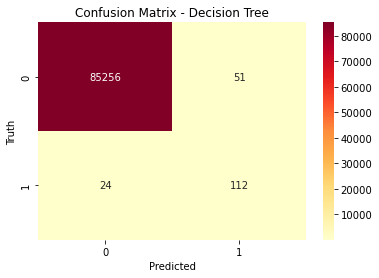

In [31]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

sns.heatmap(confusion_matrix_dt, annot = True, cmap = "YlOrRd", fmt = 'g')
plt.ylabel('Truth')
plt.xlabel('Predicted')
plt.title("Confusion Matrix - Decision Tree")

print("Evaluation of Decision Tree Model")
print()
metrics(test_Y, predictions_dt.round())

Confusion Matrix - Random Forest
[[85300     7]
 [   27   109]]
Evaluation of Random Forest Model

Accuracy: 0.99960
Precision: 0.93966
Recall: 0.80147
F1-score: 0.86508


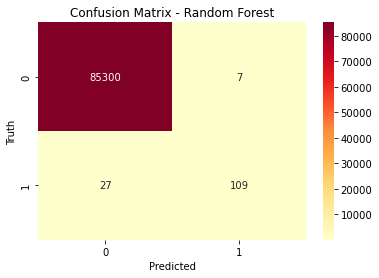

In [32]:
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

sns.heatmap(confusion_matrix_rf, annot = True, cmap = "YlOrRd", fmt = 'g')
plt.ylabel('Truth')
plt.xlabel('Predicted')
plt.title("Confusion Matrix - Random Forest")

print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

Confusion Matrix - KNN
[[85293    14]
 [   31   105]]
Evaluation of KNN Model

Accuracy: 0.99947
Precision: 0.88235
Recall: 0.77206
F1-score: 0.82353


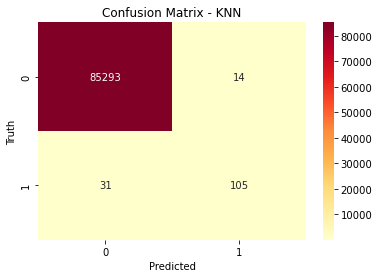

In [33]:
confusion_matrix_knn = confusion_matrix(test_Y, predictions_knn.round())
print("Confusion Matrix - KNN")
print(confusion_matrix_knn)

sns.heatmap(confusion_matrix_knn, annot = True, cmap = "YlOrRd", fmt = 'g')
plt.ylabel('Truth')
plt.xlabel('Predicted')
plt.title("Confusion Matrix - KNN")

print("Evaluation of KNN Model")
print()
metrics(test_Y, predictions_knn.round())

Confusion Matrix - Logistic Regression
[[85295    12]
 [   51    85]]
Evaluation of Logistic Regression Model

Accuracy: 0.99926
Precision: 0.87629
Recall: 0.62500
F1-score: 0.72961


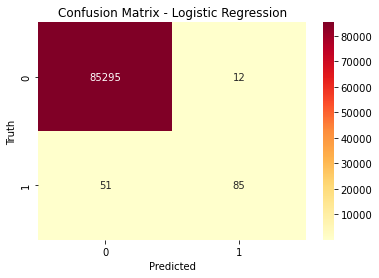

In [34]:
confusion_matrix_lr = confusion_matrix(test_Y, predictions_lr.round())
print("Confusion Matrix - Logistic Regression")
print(confusion_matrix_lr)

sns.heatmap(confusion_matrix_lr, annot = True, cmap = "YlOrRd", fmt = 'g')
plt.ylabel('Truth')
plt.xlabel('Predicted')
plt.title("Confusion Matrix - Logistic Regression")

print("Evaluation of Logistic Regression Model")
print()
metrics(test_Y, predictions_lr.round())

Confusion Matrix - SVM 
[[85300     7]
 [   45    91]]
Evaluation of SVM Model

Accuracy: 0.99939
Precision: 0.92857
Recall: 0.66912
F1-score: 0.77778


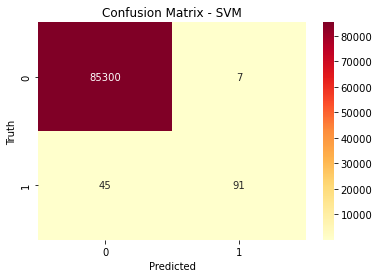

In [35]:
confusion_matrix_svm = confusion_matrix(test_Y, predictions_svm.round())
print("Confusion Matrix - SVM ")
print(confusion_matrix_svm)

sns.heatmap(confusion_matrix_svm, annot = True, cmap = "YlOrRd", fmt = 'g')
plt.ylabel('Truth')
plt.xlabel('Predicted')
plt.title("Confusion Matrix - SVM")

print("Evaluation of SVM Model")
print()
metrics(test_Y, predictions_svm.round())

Confusion Matrix - XGBoost
[[85301     6]
 [   22   114]]
Evaluation of XGBoost Model

Accuracy: 0.99967
Precision: 0.95000
Recall: 0.83824
F1-score: 0.89062


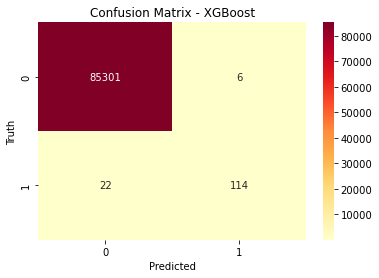

In [36]:
confusion_matrix_xgb = confusion_matrix(test_Y, predictions_xgb.round())
print("Confusion Matrix - XGBoost")
print(confusion_matrix_xgb)

sns.heatmap(confusion_matrix_xgb, annot = True, cmap = "YlOrRd", fmt = 'g')
plt.ylabel('Truth')
plt.xlabel('Predicted')
plt.title("Confusion Matrix - XGBoost")

print("Evaluation of XGBoost Model")
print()
metrics(test_Y, predictions_xgb.round())

Clearly, XGBoost and Random Forest model work better than others.

But, if we clearly observe our dataset suffers a serious problem of **class imbalance**. 
The genuine (not fraud) transactions are more than 99% with the fraud transactions constituting of 0.17%.

With such kind of distribution, if we train our model without taking care of the imbalance issues, it predicts the label with higher importance given to genuine transactions (as there are more data about them) and hence obtains more accuracy.

The class imbalance problem can be solved by various techniques. **Over sampling** is one of them.
 
One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. 

Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the **Synthetic Minority Oversampling Technique**, or **SMOTE** for short.

### Performing Oversampling on Random Forest and XGBoost

In [37]:
from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (568630, 29)
Resampled shape of Y:  (568630,)
Counter({0: 284315, 1: 284315})


### Build the Random Forest Classifier On the New Dataset

In [38]:
rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(train_X, train_Y)

predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100

### Visualize the Confusion Matrix

Confusion Matrix - Random Forest
[[85129    20]
 [    0 85440]]
Evaluation of Random Forest Model

Accuracy: 0.99988
Precision: 0.99977
Recall: 1.00000
F1-score: 0.99988


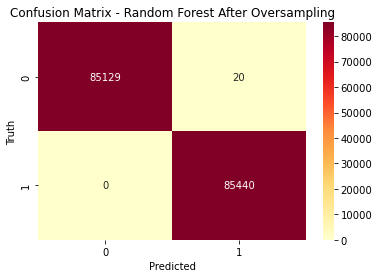

In [40]:
cm_resampled = confusion_matrix(test_Y, predictions_resampled.round())
print("Confusion Matrix - Random Forest")
print(cm_resampled)

sns.heatmap(cm_resampled, annot = True, cmap = "YlOrRd", fmt = 'g')
plt.ylabel('Truth')
plt.xlabel('Predicted')
plt.title("Confusion Matrix - Random Forest After Oversampling")

print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_resampled.round())

### Build the XGBoost Classifier On the New Dataset

In [41]:
xgb_resampled = XGBClassifier(n_estimators = 100)
xgb_resampled.fit(train_X, train_Y)

predictions_resampled_xgb = xgb_resampled.predict(test_X)
xgb_score_resampled = xgb_resampled.score(test_X, test_Y) * 100

[02:54:45] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Visualize the Confusion Matrix

Confusion Matrix - XGBoost
[[85088    61]
 [    0 85440]]
Evaluation of XGBoost Model

Accuracy: 0.99964
Precision: 0.99929
Recall: 1.00000
F1-score: 0.99964


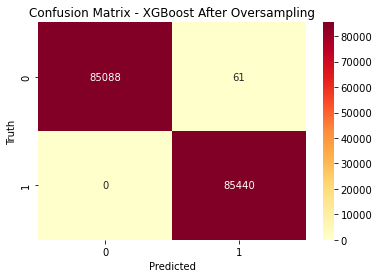

In [42]:
cm_resampled_xgb = confusion_matrix(test_Y, predictions_resampled_xgb.round())
print("Confusion Matrix - XGBoost")
print(cm_resampled_xgb)

sns.heatmap(cm_resampled_xgb, annot = True, cmap = "YlOrRd", fmt = 'g')
plt.ylabel('Truth')
plt.xlabel('Predicted')
plt.title("Confusion Matrix - XGBoost After Oversampling")

print("Evaluation of XGBoost Model")
print()
metrics(test_Y, predictions_resampled_xgb.round())

Now it is evident that after addressing the class imbalance problem, our Random Forest classifier with SMOTE performs far better than the Random Forest classifier withour SMOTE, but XGBoost classifier with SMOTE performs little worse than the XGBoost classifier withour SMOTE.

In this project we have tried to show different methods of dealing with unbalanced datasets like the fraud credit card transaction dataset where the instances of fraudulent cases is few compared to the instances of normal transactions. 



We concluded that the oversampling technique works best on the dataset and achieved significant improvement in model performance over the imabalanced data. The best score of 0.99967 was achieved using an XGBOOST model though Random Forest performed well too. It is likely that by further tuning the XGBOOST model parametres we can achieve even better performance. This project has demonstrated the importance of sampling effectively, modelling and predicting data with an imbalanced dataset.